# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=" + api_key

countries=[]
lats=[]
lons=[]
dates=[]
maxtemps=[]
winds=[]
clouds=[]
cities2=[]
hums=[]
c=0
for city in cities:
    print(f'Random city number {c}: {city}')
    c=c+1 #c+=1
    try:
        
        city_weather = url+'&q='+city
        #city_weather = f'api.openweathermap.org/data/2.5/weather?q={city}'
        data=requests.get(city_weather).json()
        #cityname=data['city']['name']
        country=data['city']['country']
        lat=data['city']['coord']['lat']
        lon=data['city']['coord']['lon']
        for date_dict in data['list']:
            cities2.append(city)
            date=date_dict['dt_txt']
            maxtemp=date_dict['main']['temp_max']
            wind=date_dict['wind']['speed']
            hum=date_dict['main']['humidity']
            cloudiness=date_dict['clouds']['all']
            countries.append(country)
            lats.append(lat)
            lons.append(lon)
            dates.append(date)
            maxtemps.append(maxtemp)
            winds.append(wind)
            clouds.append(cloudiness)
            hums.append(hum)
    except:
        continue

Random city number 0: nizhneyansk
Random city number 1: port elizabeth
Random city number 2: eganville
Random city number 3: bluff
Random city number 4: ksenyevka
Random city number 5: mys shmidta
Random city number 6: saint-philippe
Random city number 7: taolanaro
Random city number 8: luderitz
Random city number 9: abomsa
Random city number 10: sindor
Random city number 11: portree
Random city number 12: lompoc
Random city number 13: sisimiut
Random city number 14: ribeira grande
Random city number 15: carnarvon
Random city number 16: mataura
Random city number 17: san ramon de la nueva oran
Random city number 18: quang ngai
Random city number 19: bethel
Random city number 20: new norfolk
Random city number 21: longyearbyen
Random city number 22: rikitea
Random city number 23: barrow
Random city number 24: tasiilaq
Random city number 25: punta arenas
Random city number 26: barreirinhas
Random city number 27: waddan
Random city number 28: yialos
Random city number 29: saldanha
Random 

Random city number 248: palana
Random city number 249: el coco
Random city number 250: abbeville
Random city number 251: rawson
Random city number 252: san cristobal
Random city number 253: tokur
Random city number 254: kamenskoye
Random city number 255: dunedin
Random city number 256: acapulco
Random city number 257: urdzhar
Random city number 258: ilulissat
Random city number 259: pechenga
Random city number 260: shihezi
Random city number 261: truro
Random city number 262: bolivar
Random city number 263: umzimvubu
Random city number 264: yazoo city
Random city number 265: phan rang
Random city number 266: nanzhang
Random city number 267: sola
Random city number 268: hwange
Random city number 269: nailsea
Random city number 270: coihaique
Random city number 271: at-bashi
Random city number 272: beidao
Random city number 273: palafrugell
Random city number 274: parthenay
Random city number 275: tsabong
Random city number 276: yulara
Random city number 277: saleaula
Random city number 

Random city number 497: biak
Random city number 498: the valley
Random city number 499: cap malheureux
Random city number 500: tazovskiy
Random city number 501: caibarien
Random city number 502: tinskoy
Random city number 503: watertown
Random city number 504: maniitsoq
Random city number 505: jacmel
Random city number 506: shestakovo
Random city number 507: iquique
Random city number 508: oktyabrskiy
Random city number 509: manaus
Random city number 510: pisco
Random city number 511: kohlu
Random city number 512: juegang
Random city number 513: avera
Random city number 514: kropotkin
Random city number 515: biltine
Random city number 516: minas
Random city number 517: nazira
Random city number 518: gararu
Random city number 519: perbaungan
Random city number 520: mwinilunga
Random city number 521: kamenka
Random city number 522: jiexiu
Random city number 523: okato
Random city number 524: moose factory
Random city number 525: okakarara
Random city number 526: hovd
Random city number 5

In [12]:
data



{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1573354800,
   'main': {'temp': 291.48,
    'temp_min': 288.54,
    'temp_max': 291.48,
    'pressure': 1010,
    'sea_level': 1010,
    'grnd_level': 913,
    'humidity': 37,
    'temp_kf': 2.94},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 0},
   'wind': {'speed': 4.07, 'deg': 235},
   'sys': {'pod': 'n'},
   'dt_txt': '2019-11-10 03:00:00'},
  {'dt': 1573365600,
   'main': {'temp': 295.74,
    'temp_min': 293.53,
    'temp_max': 295.74,
    'pressure': 1012,
    'sea_level': 1012,
    'grnd_level': 914,
    'humidity': 23,
    'temp_kf': 2.21},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': {'all': 6},
   'wind': {'speed': 2.7, 'deg': 252},
   'sys': {'pod': 'd'},
   'dt_txt': '2019-11-10 06:00:00'},
  {'dt': 1573376400,
   'main': {'temp': 301.96,
    'temp_min': 300.49,
    

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
df=pd.DataFrame({'Cities':cities2, 'Countries':countries,'Dates':dates,'Cloudiness':clouds,'MaxTemp': maxtemps,'Wind':winds,'Lat':lats,'Lon':lons, 'Humidity':hums})
df

,Cities,Countries,Dates,Cloudiness,MaxTemp,Wind,Lat,Lon,Humidity
0,port elizabeth,US,2019-11-10 03:00:00,67,273.69,1.49,39.3134,-74.9811,65
1,port elizabeth,US,2019-11-10 06:00:00,54,274.05,2.07,39.3134,-74.9811,63
2,port elizabeth,US,2019-11-10 09:00:00,85,275.72,2.61,39.3134,-74.9811,73
3,port elizabeth,US,2019-11-10 12:00:00,80,276.50,3.28,39.3134,-74.9811,73
4,port elizabeth,US,2019-11-10 15:00:00,81,282.10,5.44,39.3134,-74.9811,53
5,port elizabeth,US,2019-11-10 18:00:00,40,284.45,4.66,39.3134,-74.9811,50
6,port elizabeth,US,2019-11-10 21:00:00,71,282.62,2.79,39.3134,-74.9811,64
7,port elizabeth,US,2019-11-11 00:00:00,58,279.27,2.22,39.3134,-74.9811,72
8,port elizabeth,US,2019-11-11 03:00:00,26,279.61,2.13,39.3134,-74.9811,77
9,port elizabeth,US,2019-11-11 06:00:00,30,279.61,1.76,39.3134,-74.9811,85


In [28]:
data_drop = df.drop_duplicates(subset ="Cities", 
                     keep = 'first', inplace = False).reset_index(drop=True) 
# displaying data 
data_drop

,Cities,Countries,Dates,Cloudiness,MaxTemp,Wind,Lat,Lon,Humidity
0,port elizabeth,US,2019-11-10 03:00:00,67,273.69,1.49,39.3134,-74.9811,65
1,eganville,CA,2019-11-10 03:00:00,70,274.01,4.33,45.5407,-77.1005,81
2,bluff,AU,2019-11-10 03:00:00,27,303.45,1.74,-23.5800,149.0661,9
3,saint-philippe,CA,2019-11-10 03:00:00,95,273.96,4.66,45.3584,-73.4791,61
4,luderitz,NA,2019-11-10 03:00:00,20,288.62,3.69,-26.6481,15.1594,95
5,sindor,RU,2019-11-10 03:00:00,100,263.02,2.83,62.8662,51.8991,93
6,portree,GB,2019-11-10 03:00:00,14,277.73,1.25,57.4129,-6.1942,67
7,lompoc,US,2019-11-10 03:00:00,0,290.11,6.36,34.6392,-120.4580,63
8,sisimiut,GL,2019-11-10 03:00:00,27,269.20,7.04,66.9395,-53.6735,49
9,ribeira grande,PT,2019-11-10 03:00:00,31,289.78,1.88,38.5167,-28.7001,86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

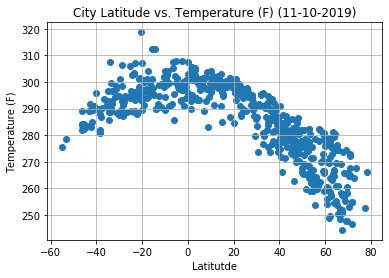

In [36]:
# Build Scatter Plot of Temp (F) vs. Latitude

plt.scatter(data_drop["Lat"], data_drop["MaxTemp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (F) (11-10-2019)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

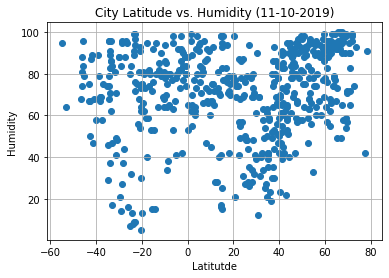

In [37]:
# Build Scatter Plot of Temp (F) vs. Latitude

plt.scatter(data_drop["Lat"], data_drop["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (11-10-2019)")
plt.ylabel("Humidity")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

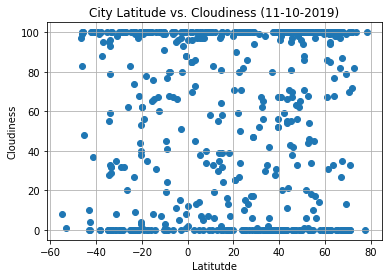

In [38]:
# Build Scatter Plot of Temp (F) vs. Latitude

plt.scatter(data_drop["Lat"], data_drop["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (11-10-2019)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

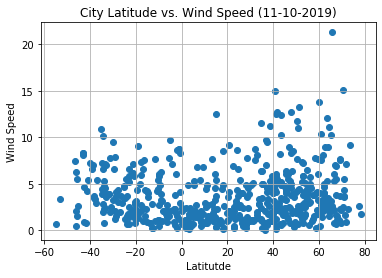

In [39]:
# Build Scatter Plot of Temp (F) vs. Latitude

plt.scatter(data_drop["Lat"], data_drop["Wind"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (11-10-2019)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitutde")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_WindSpeed.png")

# Show plot
plt.show()